### Scraped Twitter Network Tweets
https://github.com/Jefferson-Henrique/GetOldTweets-python

In [1]:
import got3
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os
os.getcwd()

'C:\\Users\\Gamer\\Desktop\\hist_tweets\\GetOldTweets-python'

In [2]:
with open('tweet_df.pkl', 'rb') as filehandle:  
    # read the data as binary data stream
    df_tweets = pickle.load(filehandle)
df_tweets.head()

,id,date,text,author,favorite,url
0,340609093125423104,2013-05-31 16:21:50,Paper wallets are the best way to store # bitc...,aantonop,0,https://twitter.com/aantonop/status/3406090931...
1,340578313456218112,2013-05-31 14:19:32,@ LetsTalkBitcoin Thank you. So new to twitter...,aantonop,0,https://twitter.com/aantonop/status/3405783134...
2,340552331110273024,2013-05-31 12:36:17,@ edla @ BLOUIN_NEWS @ swardley @ Archimedius ...,aantonop,0,https://twitter.com/aantonop/status/3405523311...
3,340551805593329667,2013-05-31 12:34:12,@ edla @ BLOUIN_NEWS @ swardley @ Archimedius ...,aantonop,0,https://twitter.com/aantonop/status/3405518055...
4,340541494295404545,2013-05-31 11:53:13,@ BLOUIN_NEWS @ edla @ swardley @ Archimedius ...,aantonop,0,https://twitter.com/aantonop/status/3405414942...


In [3]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2563803 entries, 0 to 70
Data columns (total 6 columns):
id          object
date        datetime64[ns]
text        object
author      object
favorite    int64
url         object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 136.9+ MB


In [4]:
df_tweets = df_tweets.sort_values(by='date')
df_tweets = df_tweets.reset_index(drop=True)
df_tweets.head()

,id,date,text,author,favorite,url
0,1089186195,2008-12-31 17:48:08,I just finished doing Wii Fit Yoga and really ...,billbarhydt,0,https://twitter.com/billbarhydt/status/1089186195
1,1089432998,2008-12-31 20:52:39,Champagne tasting on the roof,jack,0,https://twitter.com/jack/status/1089432998
2,1089472226,2008-12-31 21:11:51,happy new years nycers.,TheStalwart,0,https://twitter.com/TheStalwart/status/1089472226
3,1089486321,2008-12-31 21:20:26,Happy New Year east coast peeps!,billbarhydt,0,https://twitter.com/billbarhydt/status/1089486321
4,1089486628,2008-12-31 21:20:39,Happy new year! Prime rib was an utter success!,garrytan,0,https://twitter.com/garrytan/status/1089486628


In [5]:
df_tweets = df_tweets.drop_duplicates()
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2563803 entries, 0 to 2563802
Data columns (total 6 columns):
id          object
date        datetime64[ns]
text        object
author      object
favorite    int64
url         object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 136.9+ MB


In [6]:
df_copytime = df_tweets.copy()
df_copytime.set_index('date', inplace=True)

In [7]:
df = df_copytime.groupby(df_copytime.index.date).count()
df.head()

,id,text,author,favorite,url
2008-12-31,9,9,9,9,9
2009-01-01,36,36,36,36,36
2009-01-02,46,46,46,46,46
2009-01-03,34,34,34,34,34
2009-01-04,25,25,25,25,25


<function matplotlib.pyplot.show(*args, **kw)>

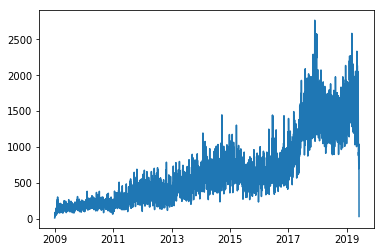

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['id'])
plt.show

#### Filter by Favorites

In [9]:
df_fav = df_tweets[df_tweets['favorite']>100].copy()
df_fav.set_index('date', inplace=True)
df_fav.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145143 entries, 2009-04-06 17:24:52 to 2019-06-05 05:58:56
Data columns (total 5 columns):
id          145143 non-null object
text        145143 non-null object
author      145143 non-null object
favorite    145143 non-null int64
url         145143 non-null object
dtypes: int64(1), object(4)
memory usage: 6.6+ MB


In [10]:
df_ft = df_fav.groupby(df_fav.index.date).count()
df_ft.head()

,id,text,author,favorite,url
2009-04-06,1,1,1,1,1
2009-04-23,1,1,1,1,1
2009-05-04,2,2,2,2,2
2009-05-08,1,1,1,1,1
2009-05-12,1,1,1,1,1


<function matplotlib.pyplot.show(*args, **kw)>

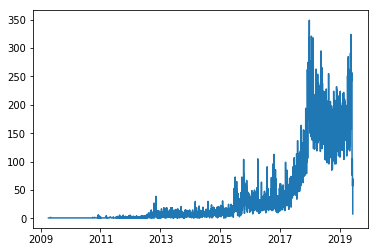

In [11]:
plt.plot(df_ft.index, df_ft['id'])
plt.show